In [9]:
import numpy
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def marchenko_pastur_pdf(x,Q,sigma=1):
        y=1/Q
        b=np.power(sigma*(1 + np.sqrt(1/Q)),2) # Largest eigenvalue
        a=np.power(sigma*(1 - np.sqrt(1/Q)),2) # Smallest eigenvalue
        return (1/(2*np.pi*sigma*sigma*x*y))*np.sqrt((b-x)*(x-a))*(0 if (x > b or x <a ) else 1)
    
    def compare_eigenvalue_distribution(correlation_matrix, Q, sigma=1, set_autoscale = True, show_top = True):
        e, _ = np.linalg.eig(correlation_matrix) # Correlation matrix is Hermitian, so this is faster
                                   # than other variants of eig
    
        x_min = .0001 if np.power(sigma*(1 - np.sqrt(1/Q)),2) < .0001 else np.power(sigma*(1 - np.sqrt(1/Q)),2)
        x_max = np.power(sigma*(1 + np.sqrt(1/Q)),2)
            
        fig = plt.figure()
        ax  = fig.add_subplot(111)
        bins = 50
        if not show_top:
            # Clear top eigenvalue from plot
            e=e[ e <= x_max+1]
        ax.hist(e, normed = True, bins=50) # Histogram the eigenvalues
        ax.set_autoscale_on(set_autoscale)
        
        # Plot the theoretical density
        f = np.vectorize(lambda x : marchenko_pastur_pdf(x,Q,sigma=sigma))
        
        x_min = .0001 if np.power(sigma*(1 - np.sqrt(1/Q)),2) < .0001 else np.power(sigma*(1 - np.sqrt(1/Q)),2)
        x_max = np.power(sigma*(1 + np.sqrt(1/Q)),2)
        
        x = np.linspace(x_min,x_max,5000)
        ax.plot(x,f(x), linewidth=4, color = 'r')

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

In [3]:
def cv(a):
    "Covariance matrix"
    return numpy.matmul(a, a.transpose())/a.shape[1]


In [4]:
def randcv(n, p, s,
    t="N",
    f=None):
    """
    s lots of covariance matrices of random matrices of n x p shape

    t: N for normal, B for binary distribution [0,1] 

    f: Filter. Z0 , Z1 for zscore on axis 0 or 1

    Returns  s x n x n array
    """
    r=[]
    for i in range(s):
        x=numpy.random.normal(size=(n,p))
        if t == "B":
            x=x>0.5
        if f == "Z0":
            x=scipy.stats.zscore(x, axis=0)
        elif f == "Z1":
            x=scipy.stats.zscore(x, axis=1)
        r.append(cv(x))
    return numpy.array(r)


In [5]:
def marchpast(l, g):
    "Marchenko-Pastur distribution"
    def m0(a):
        "Element wise maximum of (a,0)"
        return numpy.maximum(a, numpy.zeros_like(a))
    gplus=(1+g**0.5)**2
    gminus=(1-g**0.5)**2
    return numpy.sqrt(  m0(gplus  - l) *  m0(l- gminus)) / ( 2*numpy.pi*g*l)


In [81]:
def EE(a, gamma):
    "Calculate and show histogram of eigenvalues"
    ee, ev=numpy.linalg.eigh(a)
    nn, bb, patches=plt.hist(ee.ravel(), 
                                bins="auto", 
                                density=True)
    x=numpy.arange(bb[0], bb[-1], 0.003)
    plt.plot(x, marchpast(x, gamma),linewidth=7.0)
    plt.ylim(top=nn[1:].max() * 1.1)
    #plt.annotate('Help here!', xy=(1.98, 0.2),xytext=(1.98, 0.2) ,horizontalalignment="center",arrowprops=dict(arrowstyle='->',lw=1))
    plt.text(2.8, 0.2, r'+$\lambda$', fontsize=50)
    plt.annotate('', xy=(2.5, 0),  xycoords='data',
            xytext=(0.75, 0.2), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
    plt.text(-0.03, 0.4, r'-$\lambda$', fontsize=50)
    plt.annotate('', xy=(0.16, 0),  xycoords='data',
            xytext=(0.05, 0.45), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top'
            )
    #plt.title("Marchenko–Pastur distribution and Eigenvalues boundaries", fontsize = 35)
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.savefig("Marchenko_Pastur_new.png")
    plt.show()


/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


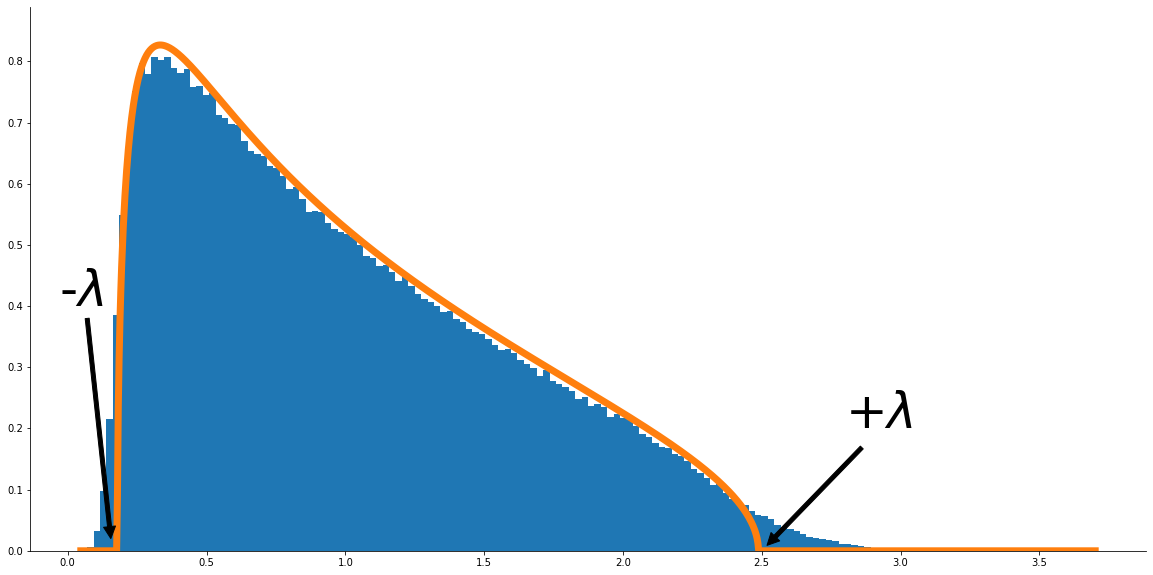

In [82]:
EE(randcv(10,30,50000, "N"), 10/30)